<a href="https://colab.research.google.com/github/poojasukhdeve-project/Sportify-Analysis/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify Data Analysis


### **Load the Dataset**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/charts.csv')
df.head()

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name
0,4/15/2021,de,82,625718,20IvMlpi4U5RuDnAlXSRiV,['Haftbefehl'],['german hip hop'],198746,False,Crackküche
1,1/31/2019,jp,171,50896,0V1K6MU0utODk4yNqZKsFv,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False,WATER
2,11/15/2018,tr,59,185439,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
3,11/22/2018,tr,133,111159,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
4,11/29/2018,tr,166,96204,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen


In [2]:
df.dtypes # what type of data type is used

,0
date,object
country,object
position,int64
streams,int64
track_id,object
artists,object
artist_genres,object
duration,int64
explicit,bool
name,object


#### Check for Missing Values

In [3]:
print(df.isnull().sum()) # Shows how many missing values per columns
print(df.isnull().sum().sum()) # Shows total number of missing values

date               0
country            0
position           0
streams            0
track_id           0
artists            0
artist_genres      0
duration           0
explicit           0
name             187
dtype: int64
187


##### Check for duplicate rows


In [4]:
df_temp = df.copy()
for col in df_temp.columns:
    if df_temp[col].apply(type).eq(list).any():
        df_temp[col] = df_temp[col].apply(str)

# Now check for duplicates
duplicates = df_temp.duplicated()
print(duplicates.sum())  # Number of duplicate rows


0


In [5]:
non_list_columns = ['date', 'country', 'position', 'streams', 'track_id', 'duration', 'explicit', 'name']
duplicates = df.duplicated(subset=non_list_columns)
print(duplicates.sum())


0


##### Check for inconsistent Data

In [6]:
for col in df.select_dtypes(include='object'):
    if df[col].apply(type).eq(list).any():
        print(f"Skipping column '{col}' (contains lists)")
    else:
        print(f"Unique values in {col}:\n{df[col].unique()}\n")


Unique values in date:
['4/15/2021' '1/31/2019' '11/15/2018' '11/22/2018' '11/29/2018'
 '12/6/2018' '2/2/2023' '2/23/2017' '11/16/2014' '11/23/2014' '11/30/2014'
 '12/7/2014' '12/14/2014' '12/21/2014' '12/28/2014' '1/4/2015' '1/11/2015'
 '1/18/2015' '1/25/2015' '4/30/2015' '5/7/2015' '5/14/2015' '12/3/2015'
 '12/10/2015' '12/17/2015' '3/3/2022' '3/10/2022' '3/17/2022' '3/24/2022'
 '3/31/2022' '4/7/2022' '4/14/2022' '4/21/2022' '4/28/2022' '5/5/2022'
 '5/12/2022' '5/19/2022' '5/26/2022' '6/2/2022' '6/9/2022' '6/16/2022'
 '6/23/2022' '6/30/2022' '7/7/2022' '7/14/2022' '7/21/2022' '7/28/2022'
 '8/4/2022' '8/11/2022' '8/25/2022' '9/1/2022' '9/8/2022' '9/15/2022'
 '9/22/2022' '9/29/2022' '10/6/2022' '10/13/2022' '10/20/2022'
 '10/27/2022' '11/3/2022' '11/10/2022' '11/3/2016' '4/28/2016' '5/5/2016'
 '8/4/2016' '8/16/2018' '8/23/2018' '8/30/2018' '9/7/2014' '9/14/2014'
 '9/21/2014' '10/26/2014' '11/2/2014' '11/9/2014' '9/28/2014' '8/24/2014'
 '8/31/2014' '10/5/2014' '2/1/2015' '2/8/2015' '2/1

In [7]:
list_columns = [col for col in df.columns if df[col].apply(type).eq(list).any()]
print("Columns containing lists:", list_columns)

Columns containing lists: []


##### Check Datatype

In [8]:
print(df.dtypes)

date             object
country          object
position          int64
streams           int64
track_id         object
artists          object
artist_genres    object
duration          int64
explicit           bool
name             object
dtype: object


#### Look for Outliers (optional, for numeric columns)

In [9]:
print(df.describe())

           position       streams      duration
count  1.048575e+06  1.048575e+06  1.048575e+06
mean   9.705366e+01  3.102183e+05  2.148016e+05
std    5.938284e+01  1.307167e+06  4.569495e+04
min    1.000000e+00  0.000000e+00  0.000000e+00
25%    4.400000e+01  1.285900e+04  1.885600e+05
50%    9.500000e+01  4.538900e+04  2.116000e+05
75%    1.480000e+02  1.830540e+05  2.360010e+05
max    3.440000e+02  7.846090e+07  7.963609e+06


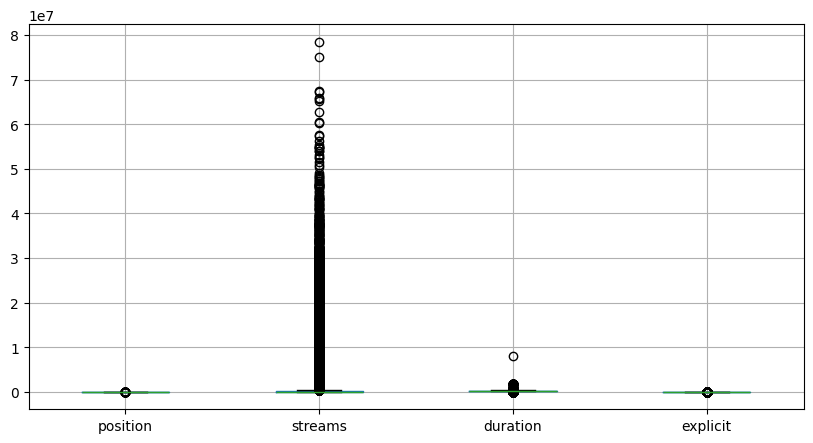

In [10]:
import matplotlib.pyplot as plt

df.boxplot(figsize=(10, 5))
plt.show()

#### Visualize Histograms (Better than Boxplot for Skewed Data)

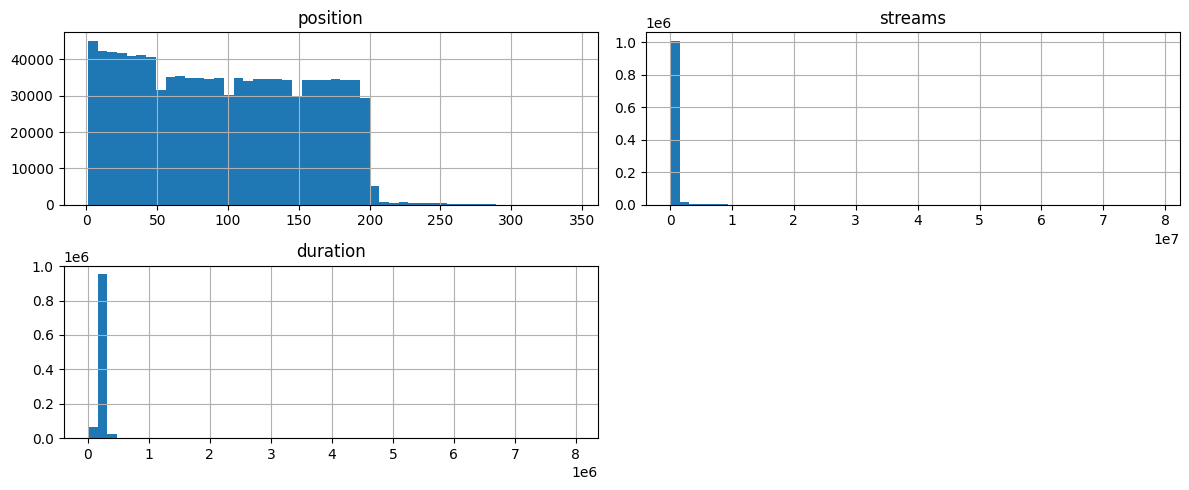

In [11]:
import matplotlib.pyplot as plt

numeric_cols = ['position', 'streams', 'duration']
df[numeric_cols].hist(bins=50, figsize=(12, 5))
plt.tight_layout()
plt.show()


#### Detect Outliers Using IQR Method

In [12]:
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Example: detect outliers in 'Position'
outliers_position = detect_outliers_iqr('position')
print(f"Number of outliers in 'Position': {len(outliers_position)}")

Number of outliers in 'Position': 60


In [13]:
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Example: detect outliers in 'Duration'
outliers_duration = detect_outliers_iqr('duration')
print(f"Number of outliers in 'duration': {len(outliers_duration)}")

Number of outliers in 'duration': 36182


In [14]:
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Example: detect outliers in 'streams'
outliers_streams = detect_outliers_iqr('streams')
print(f"Number of outliers in 'streams': {len(outliers_streams)}")

Number of outliers in 'streams': 128489


##### Option A: Remove outliers: Removes those rows completely.

In [15]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df_cleaned = df.copy()
for col in ['streams', 'duration', 'position']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

##### Option B: Cap outliers (winsorize): Replaces extreme values with boundary limits instead of removing them.

In [16]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

df_capped = df.copy()
for col in ['streams', 'duration', 'position']:
    df_capped = cap_outliers_iqr(df_capped, col)


In [17]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Make a clean copy
df_cleaned = df.copy()

# Remove outliers from all relevant columns
for col in ['position', 'streams', 'duration']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)


In [18]:
print("Original dataset size :", len(df))
print("Cleaned dataset size  :", len(df_cleaned))

Original dataset size : 1048575
Cleaned dataset size  : 887331


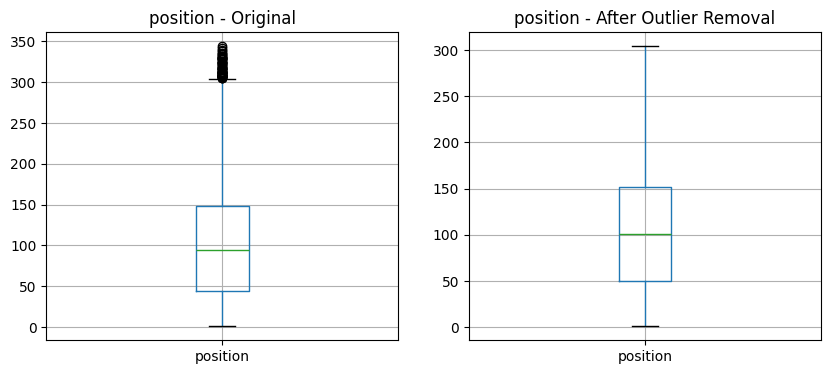

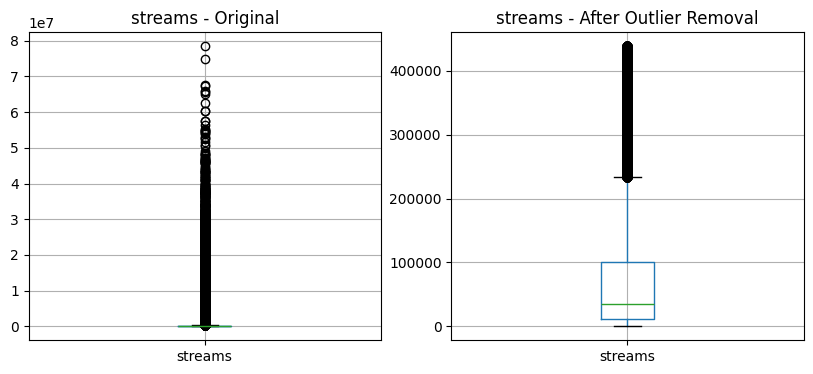

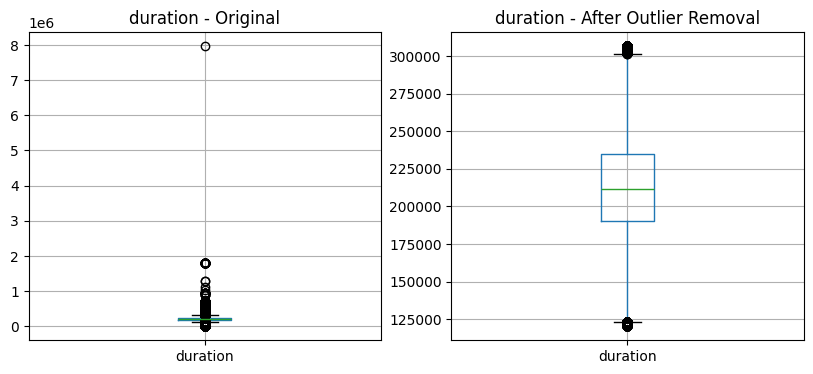

In [19]:
import matplotlib.pyplot as plt

def compare_boxplots(original_df, cleaned_df, cols):
    for col in cols:
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        original_df.boxplot(column=col)
        plt.title(f"{col} - Original")

        plt.subplot(1, 2, 2)
        cleaned_df.boxplot(column=col)
        plt.title(f"{col} - After Outlier Removal")

        plt.show()

# Compare all three
compare_boxplots(df, df_cleaned, ['position', 'streams', 'duration'])

In [20]:
df_cleaned.to_csv('cleaned_music_data.csv', index=False)

In [21]:
df_cleaned.head()

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name
2,11/15/2018,tr,59,185439,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
3,11/22/2018,tr,133,111159,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
4,11/29/2018,tr,166,96204,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
5,12/6/2018,tr,184,90088,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
6,2/2/2023,co,98,233388,6vNhBzDn5yU2fu67YliSgw,"['Kalido', 'Totoy El Frio', 'HIT$ MUSIC']","['reggaeton colombiano', 'urbano latino']",161653,True,Opciones


In [22]:
df_cleaned.dtypes

,0
date,object
country,object
position,int64
streams,int64
track_id,object
artists,object
artist_genres,object
duration,int64
explicit,bool
name,object


In [23]:
df_cleaned.describe()

,position,streams,duration
count,887331.000000,887331.000000,887331.000000
mean,101.307363,77256.980495,212360.695720
std,58.574581,98613.308535,34221.022873
min,1.000000,0.000000,120383.000000
25%,50.000000,10737.000000,190185.000000
50%,101.000000,34457.000000,211384.000000
75%,152.000000,100183.500000,234760.000000
max,304.000000,438402.000000,306466.000000


In [24]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887331 entries, 2 to 1048574
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           887331 non-null  object
 1   country        887331 non-null  object
 2   position       887331 non-null  int64 
 3   streams        887331 non-null  int64 
 4   track_id       887331 non-null  object
 5   artists        887331 non-null  object
 6   artist_genres  887331 non-null  object
 7   duration       887331 non-null  int64 
 8   explicit       887331 non-null  bool  
 9   name           887331 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 68.5+ MB


In [25]:
df.shape

(1048575, 10)

In [26]:
df_cleaned.shape

(887331, 10)

In [27]:
df_cleaned.isnull().sum()

,0
date,0
country,0
position,0
streams,0
track_id,0
artists,0
artist_genres,0
duration,0
explicit,0
name,0


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = pd.read_csv('/content/cleaned_music_data.csv')
df_cleaned.head()

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name
0,11/15/2018,tr,59,185439,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
1,11/22/2018,tr,133,111159,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
2,11/29/2018,tr,166,96204,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
3,12/6/2018,tr,184,90088,4qzZm5EIdFurBpDieEmVc9,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False,Gözleri Aşka Gülen
4,2/2/2023,co,98,233388,6vNhBzDn5yU2fu67YliSgw,"['Kalido', 'Totoy El Frio', 'HIT$ MUSIC']","['reggaeton colombiano', 'urbano latino']",161653,True,Opciones


In [29]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2024
df_2024 = df_cleaned[df_cleaned['date'].dt.year == 2020]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2024.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2024 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2024)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Top Performing Artists in 2024", dataframe=top_artists_2024)


            artist  total_streams
146     The Weeknd      349136092
43       Bad Bunny      314146287
567         DaBaby      262947132
1435   Roddy Ricch      218537302
41        J Balvin      209757164
...            ...            ...
800   Jamie Cullum           3814
3385          B-OK           3690
3386       Michela           3690
2891       Dayglow           3274
466             U2           2212

[3503 rows x 2 columns]


# Performing Artists in 2013

In [31]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2024
df_2013 = df_cleaned[df_cleaned['date'].dt.year == 2013]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2013.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2013 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2013)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Top Performing Artists in 2024", dataframe=top_artists_2024)


             artist  total_streams
1            Avicii       55436642
45         2 Chainz       50732625
39      Naughty Boy       45829792
278       Sam Smith       45715735
59     Jason Derulo       43637846
..              ...            ...
33           Maluma           1318
157       Sita Chan           1314
185  Punnany Massif           1065
276      Disclosure           1061
277  London Grammar           1061

[327 rows x 2 columns]


In [32]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2013
df_2013 = df_cleaned[df_cleaned['date'].dt.year == 2013]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2013.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top-performing artists
import pandas as pd
artist_df = pd.DataFrame(
    artist_streams.items(),
    columns=['artist', 'total_streams']
).sort_values(by='total_streams', ascending=False)

print(artist_df)

# ---- NEW: count how many unique artists performed in 2013 ----
total_artists_2013 = len(artist_streams)
print(f"Total unique artists in 2013: {total_artists_2013}")


             artist  total_streams
1            Avicii       55436642
45         2 Chainz       50732625
39      Naughty Boy       45829792
278       Sam Smith       45715735
59     Jason Derulo       43637846
..              ...            ...
33           Maluma           1318
157       Sita Chan           1314
185  Punnany Massif           1065
276      Disclosure           1061
277  London Grammar           1061

[327 rows x 2 columns]
Total unique artists in 2013: 327


In [33]:
import ast

# 1) Filter to 2013
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_2013 = df_cleaned[df_cleaned['date'].dt.year == 2013]

# 2) Explode all artist‐lists into one Series
all_artists = (
    df_2013['artists']
      .apply(ast.literal_eval)   # turn the "['A','B']" strings into Python lists
      .explode()                 # one artist per row
      .str.strip()               # remove extra whitespace
)

# 3) Get unique artist names and count them
unique_artists = all_artists.unique()
print(f"Total unique artists in 2013: {len(unique_artists)}")

# (Optional) see who they are:
# print(unique_artists)


Total unique artists in 2013: 327


In [34]:
# after your filter…
df_2013 = df_cleaned[df_cleaned['date'].dt.year == 2013]

# total streams in 2013:
total_streams_2013 = df_2013['streams'].sum()
print(f"Total streams in 2013: {total_streams_2013:,}")


Total streams in 2013: 672,262,555


In [30]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2013
df_2013 = df_cleaned[df_cleaned['date'].dt.year == 2013].copy()

# 3. Extract month (as number and name)
df_2013['month_num']  = df_2013['date'].dt.month
df_2013['month_name'] = df_2013['date'].dt.month_name()

# 4. Aggregate total streams by month number
monthly = (
    df_2013
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2013',
    labels={'streams':'Total Streams', 'month_name':'Month'},
)
fig.update_layout(xaxis={'categoryorder':'array','categoryarray':monthly['month_name']})
fig.show()


# Performing Artists in 2014

In [35]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2014 = df_cleaned[df_cleaned['date'].dt.year == 2014]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2014.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2014 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2014)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Top Performing Artists in 2024", dataframe=top_artists_2024)


              artist  total_streams
31     Calvin Harris      201294548
4            Pitbull      154025582
129     Jason Derulo      127642549
356            Kesha      102646023
318      Nico & Vinz       97049088
..               ...            ...
299        AmabAdamA           1430
180  Einar Júlíusson           1276
322            Separ           1128
8           Ane Brun           1012
9      Linnea Olsson           1012

[677 rows x 2 columns]


In [36]:
import ast

# Explode all artist-lists into one Series
all_artists = (
    df_2014['artists']
      .apply(ast.literal_eval)  # turns "['A','B']" into Python lists
      .explode()                # one artist per row
      .str.strip()              # trim whitespace
)

# Unique names & count
unique_artists_2014 = all_artists.unique()
print(f"Total unique artists in 2014: {len(unique_artists_2014)}")


Total unique artists in 2014: 677


In [37]:
# after your filter…
df_2014 = df_cleaned[df_cleaned['date'].dt.year == 2014]

# total streams in 2014:
total_streams_2014 = df_2014['streams'].sum()
print(f"Total streams in 2014: {total_streams_2014:,}")

Total streams in 2014: 1,802,730,519


In [31]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2014
df_2014 = df_cleaned[df_cleaned['date'].dt.year == 2014].copy()

# 3. Extract month (as number and name)
df_2014['month_num']  = df_2014['date'].dt.month
df_2014['month_name'] = df_2014['date'].dt.month_name()

# 4. Aggregate total streams by month number
monthly_2014 = (
    df_2014
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2014,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2014',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2014['month_name']
    }
)
fig.show()


# Performing Artists in 2015

In [38]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2015 = df_cleaned[df_cleaned['date'].dt.year == 2015]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2015.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2015 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2015)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Top Performing Artists in 2024", dataframe=top_artists_2024)


              artist  total_streams
237    Justin Bieber      254209177
407         Flo Rida      210783607
290      Chris Brown      172148157
228    Calvin Harris      162249382
1562           Diplo      150689230
...              ...            ...
291         Valdimar           1059
1663        Gondwana           1018
1249  Robynn & Kendy           1016
1250      Le Ji Chen           1016
1251    Tang Siu Hau           1016

[1675 rows x 2 columns]


In [39]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2015
df_2015 = df_cleaned[df_cleaned['date'].dt.year == 2015]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2015.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
import pandas as pd
artist_df = pd.DataFrame(
    artist_streams.items(),
    columns=['artist', 'total_streams']
).sort_values(by='total_streams', ascending=False)

print(artist_df)

# ---- NEW: count how many unique artists performed in 2015 ----
total_unique_artists_2015 = len(artist_streams)
print(f"Total unique artists in 2015: {total_unique_artists_2015}")


              artist  total_streams
237    Justin Bieber      254209177
407         Flo Rida      210783607
290      Chris Brown      172148157
228    Calvin Harris      162249382
1562           Diplo      150689230
...              ...            ...
291         Valdimar           1059
1663        Gondwana           1018
1249  Robynn & Kendy           1016
1250      Le Ji Chen           1016
1251    Tang Siu Hau           1016

[1675 rows x 2 columns]
Total unique artists in 2015: 1675


In [40]:
# after your filter…
df_2015 = df_cleaned[df_cleaned['date'].dt.year == 2015]

# total streams in 2015:
total_streams_2015 = df_2015['streams'].sum()
print(f"Total streams in 2015: {total_streams_2015:,}")

Total streams in 2015: 3,705,222,665


In [32]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2015
df_2015 = df_cleaned[df_cleaned['date'].dt.year == 2015].copy()

# 3. Extract month (as number and name)
df_2015['month_num']  = df_2015['date'].dt.month
df_2015['month_name'] = df_2015['date'].dt.month_name()

# 4. Aggregate total streams by month number
monthly_2015 = (
    df_2015
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2015,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2015',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2015['month_name']
    }
)
fig.show()


# Performing Artists in 2016

In [41]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2016 = df_cleaned[df_cleaned['date'].dt.year == 2016]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2016.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2016 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2016)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Top Performing Artists in 2024", dataframe=top_artists_2024)


                 artist  total_streams
236       Justin Bieber      341897576
181    The Chainsmokers      284338827
255       Ty Dolla $ign      257002270
231       Calvin Harris      229071259
867                Seeb      215632570
...                 ...            ...
999               Adiss           1345
1530             Moisey           1236
1533     The Travellers           1190
1303  Deep Zone Project           1185
544            Megadeth           1020

[1758 rows x 2 columns]


In [41]:
# after your filter…
df_2016 = df_cleaned[df_cleaned['date'].dt.year == 2016]

# total streams in 2016:
total_streams_2016 = df_2016['streams'].sum()
print(f"Total streams in 2015: {total_streams_2016:,}")

Total streams in 2015: 6,553,586,806


In [33]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2016
df_2016 = df_cleaned[df_cleaned['date'].dt.year == 2016].copy()

# 3. Extract month (as number and name)
df_2016['month_num']  = df_2016['date'].dt.month
df_2016['month_name'] = df_2016['date'].dt.month_name()

# 4. Aggregate total streams by month number
monthly_2016 = (
    df_2016
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2016,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2016',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2016['month_name']
    }
)
fig.show()


# Performing Artists in 2017

In [42]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2017 = df_cleaned[df_cleaned['date'].dt.year == 2017]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2017.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2017 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2017)

                artist  total_streams
96          Ed Sheeran      420198734
182   The Chainsmokers      312841942
506           Dua Lipa      301823958
1252        Anne-Marie      219256559
46              Halsey      205238134
...                ...            ...
107           Chayanne           1592
1879   Kristian Kostov           1346
747       Phil Collins           1172
1476           FEYNMAN           1080
1477     Freddie Gibbs           1080

[1949 rows x 2 columns]


In [43]:
# after your filter…
df_2017 = df_cleaned[df_cleaned['date'].dt.year == 2017]

# total streams in 2017:
total_streams_2017 = df_2017['streams'].sum()
print(f"Total streams in 2017: {total_streams_2017:,}")

Total streams in 2017: 7,291,222,904


In [34]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2017
df_2017 = df_cleaned[df_cleaned['date'].dt.year == 2017].copy()

# 3. Extract month (as number and name)
df_2017['month_num']  = df_2017['date'].dt.month
df_2017['month_name'] = df_2017['date'].dt.month_name()

# 4. Aggregate total streams by month number
monthly_2017 = (
    df_2017
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2017,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2017',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2017['month_name']
    }
)
fig.show()


# Performing Artists in 2018

In [45]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2018 = df_cleaned[df_cleaned['date'].dt.year == 2018]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2018.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2018 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2018)

               artist  total_streams
148        Ed Sheeran      397652647
55              Drake      325677184
169             Ozuna      309463324
591          Dua Lipa      268623150
1663     Selena Gomez      236361285
...               ...            ...
1799  Phoebe Bridgers           2589
1798       Lord Huron           2589
304           Iskrata           2091
2522    Arik Einstein           1904
2523   Miki Gavrielov           1904

[2608 rows x 2 columns]


In [46]:
# after your filter…
df_2018 = df_cleaned[df_cleaned['date'].dt.year == 2018]

# total streams in 2018:
total_streams_2018 = df_2018['streams'].sum()
print(f"Total streams in 2018: {total_streams_2018:,}")

Total streams in 2018: 8,641,942,300


In [35]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2018
df_2018 = df_cleaned[df_cleaned['date'].dt.year == 2018].copy()

# 3. Extract month (as number and name)
df_2018['month_num']  = df_2018['date'].dt.month
df_2018['month_name'] = df_2018['date'].dt.month_name()

# 4. Aggregate total streams by month
monthly_2018 = (
    df_2018
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2018,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2018',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2018['month_name']
    }
)
fig.show()


# Performing Artists in 2019

In [47]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2019 = df_cleaned[df_cleaned['date'].dt.year == 2019]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2019.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2019 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2019)

               artist  total_streams
760    Bradley Cooper      223038137
759         Lady Gaga      223038137
10           Anuel AA      218058716
1416             Lauv      214659259
1506    Billie Eilish      204935239
...               ...            ...
1819     Karim Mohsen           2653
1146       MC Kevinho           2565
3110  Mariotube Doody           1823
2832        Scorpions           1773
801              JONY           1480

[3116 rows x 2 columns]


In [48]:
# after your filter…
df_2019 = df_cleaned[df_cleaned['date'].dt.year == 2019]

# total streams in 2015:
total_streams_2019 = df_2019['streams'].sum()
print(f"Total streams in 2019: {total_streams_2019:,}")

Total streams in 2019: 9,082,197,897


In [36]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2019
df_2019 = df_cleaned[df_cleaned['date'].dt.year == 2019].copy()

# 3. Extract month (as number and name)
df_2019['month_num']  = df_2019['date'].dt.month
df_2019['month_name'] = df_2019['date'].dt.month_name()

# 4. Aggregate total streams by month
monthly_2019 = (
    df_2019
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2019,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2019',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2019['month_name']
    }
)
fig.show()


# Performing Artists in 2020

In [49]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2020 = df_cleaned[df_cleaned['date'].dt.year == 2020]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2020.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2020 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2020)

            artist  total_streams
146     The Weeknd      349136092
43       Bad Bunny      314146287
567         DaBaby      262947132
1435   Roddy Ricch      218537302
41        J Balvin      209757164
...            ...            ...
800   Jamie Cullum           3814
3385          B-OK           3690
3386       Michela           3690
2891       Dayglow           3274
466             U2           2212

[3503 rows x 2 columns]


In [50]:
# after your filter…
df_2020 = df_cleaned[df_cleaned['date'].dt.year == 2020]

# total streams in 2020:
total_streams_2020 = df_2020['streams'].sum()
print(f"Total streams in 2020: {total_streams_2020:,}")

Total streams in 2020: 9,520,788,768


In [37]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2020
df_2020 = df_cleaned[df_cleaned['date'].dt.year == 2020].copy()

# 3. Extract month (as number and name)
df_2020['month_num']  = df_2020['date'].dt.month
df_2020['month_name'] = df_2020['date'].dt.month_name()

# 4. Aggregate total streams by month
monthly_2020 = (
    df_2020
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2020,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2020',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2020['month_name']
    }
)
fig.show()


# Performing Artists in 2021

In [51]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2021 = df_cleaned[df_cleaned['date'].dt.year == 2021]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2021.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2021 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2021)

              artist  total_streams
146       The Weeknd      500915028
870       Ed Sheeran      348544732
36         Bad Bunny      328004125
1468          Maluma      318514104
3389          Tiësto      231648939
...              ...            ...
996     Emmsjé Gauti           4845
997   Helgi Sæmundur           4845
3620            Nosi           4595
3621         Bandana           4595
2174          Huginn           4231

[3820 rows x 2 columns]


In [53]:
# after your filter…
df_2021 = df_cleaned[df_cleaned['date'].dt.year == 2021]

# total streams in 2021:
total_streams_2021 = df_2021['streams'].sum()
print(f"Total streams in 2021: {total_streams_2021:,}")

Total streams in 2021: 10,514,379,144


In [38]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2021
df_2021 = df_cleaned[df_cleaned['date'].dt.year == 2021].copy()

# 3. Extract month (as number and name)
df_2021['month_num']  = df_2021['date'].dt.month
df_2021['month_name'] = df_2021['date'].dt.month_name()

# 4. Aggregate total streams by month
monthly_2021 = (
    df_2021
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2021,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2021',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2021['month_name']
    }
)
fig.show()


# Performing Artists in 2022

In [54]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2022 = df_cleaned[df_cleaned['date'].dt.year == 2022]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2022.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2022 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2022)

                   artist  total_streams
534            Ed Sheeran      485294963
356             Bad Bunny      471275102
138            The Weeknd      350245862
184          Harry Styles      206565427
2074        Glass Animals      195104282
...                   ...            ...
3295                 MIKA           5031
3123           Yung Rizzo           4763
2014                  Egó           4520
2584  Herbert Guðmundsson           4430
98          Chief $upreme           3426

[3987 rows x 2 columns]


In [55]:
# after your filter…
df_2022 = df_cleaned[df_cleaned['date'].dt.year == 2022]

# total streams in 2022:
total_streams_2022 = df_2022['streams'].sum()
print(f"Total streams in 2022: {total_streams_2022:,}")

Total streams in 2022: 9,883,588,641


In [39]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2022
df_2022 = df_cleaned[df_cleaned['date'].dt.year == 2022].copy()

# 3. Extract month (as number and name)
df_2022['month_num']  = df_2022['date'].dt.month
df_2022['month_name'] = df_2022['date'].dt.month_name()

# 4. Aggregate total streams by month
monthly_2022 = (
    df_2022
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2022,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2022',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2022['month_name']
    }
)
fig.show()


# Performing Artists in 2023

In [56]:
# Convert the 'date' column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Filter the data for the year 2014
df_2023 = df_cleaned[df_cleaned['date'].dt.year == 2023]

# Group by artist and sum the streams
import ast
from collections import defaultdict

artist_streams = defaultdict(int)

# Loop through each row and accumulate streams for each artist
for _, row in df_2023.iterrows():
    artists = ast.literal_eval(row['artists'])
    for artist in artists:
        artist_streams[artist.strip()] += row['streams']

# Convert to DataFrame and get top 10 performing artists
artist_df = pd.DataFrame(artist_streams.items(), columns=['artist', 'total_streams'])
top_artists_2023 = artist_df.sort_values(by='total_streams', ascending=False)

print(top_artists_2023)

               artist  total_streams
146               SZA      125204412
720         Coi Leray       29339393
884        Baby Rasta       22778851
883    Rauw Alejandro       22778851
149              Feid       22415422
...               ...            ...
633          Tónhylur           5311
1114    TheFrenchKris           4977
826            Shibui           4294
827   Andrea Zelletta           4294
825    Stefy De Cicco           4294

[1133 rows x 2 columns]


In [57]:
# after your filter…
df_2023 = df_cleaned[df_cleaned['date'].dt.year == 2023]

# total streams in 2023:
total_streams_2023 = df_2023['streams'].sum()
print(f"Total streams in 2023: {total_streams_2023:,}")

Total streams in 2023: 884,591,561


In [40]:
import pandas as pd
import plotly.express as px

# 1. Ensure datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2023
df_2023 = df_cleaned[df_cleaned['date'].dt.year == 2023].copy()

# 3. Extract month (as number and name)
df_2023['month_num']  = df_2023['date'].dt.month
df_2023['month_name'] = df_2023['date'].dt.month_name()

# 4. Aggregate total streams by month
monthly_2023 = (
    df_2023
    .groupby(['month_num', 'month_name'])['streams']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

# 5. Plot a bar chart
fig = px.bar(
    monthly_2023,
    x='month_name',
    y='streams',
    title='Total Streams per Month in 2023',
    labels={'streams': 'Total Streams', 'month_name': 'Month'},
)
fig.update_layout(
    xaxis={
        'categoryorder': 'array',
        'categoryarray': monthly_2023['month_name']
    }
)
fig.show()


### Total Stream Per Year from 2013 - 2023

In [42]:
import pandas as pd
import plotly.express as px

# 1. Make sure your dates are datetimes
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Extract year
df_cleaned['year'] = df_cleaned['date'].dt.year

# 3. Aggregate total streams by year, ensuring all years 2013–2023 appear
years = list(range(2013, 2023))
yearly_streams = (
    df_cleaned
    .groupby('year')['streams']
    .sum()
    .reindex(years, fill_value=0)
    .reset_index()
    .rename(columns={'streams': 'total_streams'})
)

# 4. Plot with Plotly Express
fig = px.line(
    yearly_streams,
    x='year',
    y='total_streams',
    title='Total Streams per Year (2013–2023)',
    markers=True
)
fig.update_layout(
    xaxis=dict(dtick=1, title='Year'),
    yaxis_title='Total Streams'
)

fig.show()


In [62]:
import pandas as pd
import plotly.express as px
#import ace_tools as tools

# 1. Ensure datetime and extract year
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['year'] = df_cleaned['date'].dt.year

# 2. Filter for years 2013–2023
df_period = df_cleaned[(df_cleaned['year'] >= 2013) & (df_cleaned['year'] <= 2023)].copy()

# 3. Aggregate total streams by country and year
grouped = (
    df_period
    .groupby(['country', 'year'])['streams']
    .sum()
    .reset_index()
)

# 4. Pivot to have years as columns
pivot_df = grouped.pivot(index='country', columns='year', values='streams').fillna(0)

# 5. Display the pivot table
print("Pivot Table:")
print(pivot_df)

#tools.display_dataframe_to_user(name="Country-wise Streams (2013–2023)",dataframe=pivot_df)

# 6. Plot a line chart for each country
fig = px.line(
    grouped,
    x='year',
    y='streams',
    color='country',
    title="Country-wise Total Streams (2013–2023)",
    markers=True
)
fig.update_layout(
    xaxis=dict(dtick=1, title='Year'),
    yaxis_title='Total Streams'
)

fig.show()


Pivot Table:
year           2013        2014         2015         2016         2017  \
country                                                                  
ad              0.0         0.0          0.0     127029.0      57769.0   
ae              0.0         0.0          0.0          0.0          0.0   
ar         870804.0  33938900.0  129250762.0  269588793.0  286109908.0   
at        3285286.0   9601785.0   19623381.0   54604945.0   53319075.0   
au       25521092.0  55609177.0  149547794.0  283105933.0  269354187.0   
...             ...         ...          ...          ...          ...   
us       35909346.0  43245103.0   60068159.0          0.0          0.0   
uy          13043.0   2678058.0    7206827.0   23575294.0   38126097.0   
ve              0.0         0.0          0.0          0.0          0.0   
vn              0.0         0.0          0.0          0.0          0.0   
za              0.0         0.0          0.0          0.0          0.0   

year            2018    

In [63]:
import pandas as pd
import plotly.express as px
#import ace_tools as tools

# 1. Ensure datetime and extract year
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['year'] = df_cleaned['date'].dt.year

# 2. Filter for years 2013–2023
df_period = df_cleaned[(df_cleaned['year'] >= 2013) & (df_cleaned['year'] <= 2023)].copy()

# 3. Aggregate total streams by country and year
grouped = (
    df_period
    .groupby(['country', 'year'])['streams']
    .sum()
    .reset_index()
)

# 4. Pivot to have years as columns
pivot_df = grouped.pivot(index='country', columns='year', values='streams').fillna(0)

# 5. Display the pivot table
print("Pivot Table:")
print(pivot_df)

#tools.display_dataframe_to_user(name="Country-wise Streams (2013–2023)",dataframe=pivot_df)

# 6. Plot a line chart for each country
fig = px.line(
    grouped,
    x='year',
    y='streams',
    color='country',
    title="Country-wise Total Streams (2013–2023)",
    markers=True
)
fig.update_layout(
    xaxis=dict(dtick=1, title='Year'),
    yaxis_title='Total Streams'
)

fig.show()


Pivot Table:
year           2013        2014         2015         2016         2017  \
country                                                                  
ad              0.0         0.0          0.0     127029.0      57769.0   
ae              0.0         0.0          0.0          0.0          0.0   
ar         870804.0  33938900.0  129250762.0  269588793.0  286109908.0   
at        3285286.0   9601785.0   19623381.0   54604945.0   53319075.0   
au       25521092.0  55609177.0  149547794.0  283105933.0  269354187.0   
...             ...         ...          ...          ...          ...   
us       35909346.0  43245103.0   60068159.0          0.0          0.0   
uy          13043.0   2678058.0    7206827.0   23575294.0   38126097.0   
ve              0.0         0.0          0.0          0.0          0.0   
vn              0.0         0.0          0.0          0.0          0.0   
za              0.0         0.0          0.0          0.0          0.0   

year            2018    

In [44]:
import pandas as pd

# 1. Ensure your date column is datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# 2. Filter to 2013 only
df_2013 = df_cleaned[df_cleaned['date'].dt.year == 2013]

# 3. Sum streams by country
country_streams_2013 = (
    df_2013
    .groupby('country')['streams']
    .sum()
    .reset_index(name='total_streams')
    .sort_values('total_streams', ascending=False)
)

print(country_streams_2013)


   country  total_streams
32      no       75756608
10      de       72799702
18      gb       71787264
31      nl       66580632
38      se       63810537
11      dk       61568186
15      es       56757958
44      us       35909346
16      fi       35194257
2       au       25521092
17      fr       20696882
25      it       12453630
29      mx       12241352
3       be       12182719
36      pl        9094900
33      nz        7994493
5       ch        6153004
23      ie        4552543
37      pt        4088681
1       at        3285286
39      sg        2474750
30      my        1899914
43      tw        1448765
21      hk        1209909
14      ee        1168471
24      is        1019314
26      lt         910186
42      tr         877966
0       ar         870804
28      lv         715993
19      gr         591070
6       cl         151047
7       co         129675
35      pe          83768
22      hu          72671
9       cz          72260
40      sk          31582
8       cr  

In [45]:
import plotly.express as px

fig = px.bar(
    country_streams_2013,
    x='country',
    y='total_streams',
    title='Total Streams by Country in 2013'
)
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Total Streams'
)
fig.show()


In [46]:
import pandas as pd

# 1. Ensure your date column is datetime and extract year
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned['year'] = df_cleaned['date'].dt.year

# 2. Filter to the 2013–2023 window
df_period = df_cleaned[(df_cleaned['year'] >= 2013) & (df_cleaned['year'] <= 2023)].copy()

# 3. Sum streams by country over that whole period
country_streams_2013_2023 = (
    df_period
    .groupby('country')['streams']
    .sum()
    .reset_index(name='total_streams')
    .sort_values('total_streams', ascending=False)
)

print(country_streams_2013_2023)


   country  total_streams
64      se     2720762963
10      ca     2691258204
51      nl     2684263425
4       au     2660682530
25      fr     2613199385
..     ...            ...
27  global       22481520
41      kz       15787780
74      ve       10081086
9       by        6098473
0       ad         712414

[77 rows x 2 columns]


In [48]:
fig = px.bar(
    country_streams_2013_2023,
    x='country',
    y='total_streams',
    title='All Countries by Total Streams (2013–2023)',
    labels={'country':'Country', 'total_streams':'Total Streams'}
)
fig.update_layout(xaxis_tickangle=-90)
fig.show()


In [66]:
import pandas as pd
import plotly.express as px

# Data for total streams per year
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
total_streams = [
    672262555,
    1802730519,
    3705222665,
    6553586806,
    7291222904,
    8641942300,
    9082197897,
    9520788768,
    10514379144,
    9883588641,
    884591561
]

# Create DataFrame
df_streams = pd.DataFrame({
    'Year': years,
    'Total Streams': total_streams
})

# Plot with Plotly
fig = px.line(
    df_streams,
    x='Year',
    y='Total Streams',
    markers=True,
    title='Total Streams per Year (2013–2023)'
)

# Ensure each year is shown
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))

fig.show()


1. Trends & Popularity Analysis
Top Songs Over Time: Line chart showing the most streamed songs over different dates.?